In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [39]:
#Importamos el Dataset mediante la URL del github
url = "https://raw.githubusercontent.com/Martin-carrizalez/BIOMACHINE-LAB/refs/heads/main/dataset/PCOS_data.csv"
df_pocs =  pd.read_csv(url)
df_pocs.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [40]:
#Vemos la naturaleza del Dataset
df_pocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [41]:
#Comparamos casos positivos contra negatios
df_pocs["PCOS (Y/N)"].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [42]:
#Separamos variables categoricas de numericas
cat_cols = df_pocs.select_dtypes(include='object').columns
num_cols = df_pocs.select_dtypes(include='number').columns
print(f'Las variables categoricas son: {cat_cols}')
print(f'Las variables numericas son: {num_cols}')

Las variables categoricas son: Index([], dtype='object')
Las variables numericas son: Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


Esto nos da a entender que el dataset esta hecho exclusivamente por variables numericas, lo cual posiblemente facilite la limpieza de los datos.

In [43]:
#Podemos agrupar los datos y sacar sus medias con base a nuestra variable objetivo
df_pocs.groupby("PCOS (Y/N)").mean()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,32.065934,58.008791,156.197934,23.743407,13.755495,72.964286,19.200549,11.107390,2.307692,5.126374,8.057692,0.390110,0.315934,728.982437,223.975137,19.185956,2.612676,7.680137,37.543956,33.428571,0.891236,3.007810,4.541496,24.267857,29.295005,0.727261,99.203297,0.228022,0.129121,0.153846,0.392857,0.390110,0.382920,0.228022,114.620879,76.780220,4.351648,4.637363,14.687637,15.225824,8.315027
1,30.124294,62.985876,157.074847,25.467797,13.898305,73.830508,19.333333,11.268305,3.079096,4.559322,6.901705,0.361582,0.231638,532.042537,267.554232,5.174593,14.402328,5.310678,38.915254,34.689266,0.892429,2.926723,7.844633,24.431808,92.322633,0.371740,101.136723,0.683616,0.570621,0.621469,0.576271,0.694915,0.785311,0.288136,114.745763,77.231638,9.785311,10.762712,15.697740,15.916215,8.806780


In [54]:
#Preparamos los datos para el entrenamiento
#Rellenamos los NaNs en el DataFrame principal
df_pocs.fillna(df_pocs.mean(), inplace=True)
X = df_pocs.drop("PCOS (Y/N)", axis=1) #todo menos y
# Rellenar NaN con la media de cada columna
y = df_pocs["PCOS (Y/N)"]

In [55]:
# Empecemos con un modelo de 12 variables, por ejemplo
n = 12

# Instanciamos el modelo base
lr = LogisticRegression(max_iter=10000)

# Instanciamos el método RFE para elegir las n variables más importantes
rfe = RFE(lr, n_features_to_select=n, step=2) # el módelo lr instanciado previamente es el que toma de referencia, step se refiere a cuantas variables se quita por iteracion

# Ajustamos el método RFE
rfe = rfe.fit(X, y)

/opt/homebrew/Cellar/jupyterlab/4.4.9/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# aqui se ve automáticamente cuales son las que se van a quedar dentro del modelo
print(rfe.support_)

[False False False False False False False False  True False False  True
  True False False False False False False False False False False False
 False  True False  True  True  True  True  True  True  True False False
 False  True False False False]


In [57]:
# Ranking de variables que se quedaban en el modelo 
print(rfe.ranking_)

[12  4  4  3 15  5  6  5  1  9  3  1  1 16 16  8  6 11 13 10 14  7  9 14
 15  1 13  1  1  1  1  1  1  1 10 11  2  1  8 12  7]


In [58]:
# podemos hacer una tabla para ver cuáles variables quedaron

# Crear un DataFrame con los resultados
rfe_results = pd.DataFrame({
    'Variable': X.columns,
    'Seleccionada': rfe.support_,
    'Ranking': rfe.ranking_
})

# Ordenar por ranking (1 = más importante)
rfe_results = rfe_results.sort_values(by='Ranking')

# Mostrar la tabla
rfe_results.style\
    .applymap(lambda val: 'background-color: lightgreen' if val == True else '', subset=['Seleccionada'])\
    .format({'Ranking': '{:.0f}'})

/var/folders/8q/kpr1c3bd783bcqg85qsy39hr0000gn/T/ipykernel_19239/3500185828.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda val: 'background-color: lightgreen' if val == True else '', subset=['Seleccionada'])\


,Variable,Seleccionada,Ranking
30,Hair loss(Y/N),True,1
25,PRG(ng/mL),True,1
31,Pimples(Y/N),True,1
29,Skin darkening (Y/N),True,1
37,Follicle No. (R),True,1
12,No. of abortions,True,1
11,Pregnant(Y/N),True,1
32,Fast food (Y/N),True,1
27,Weight gain(Y/N),True,1
33,Reg.Exercise(Y/N),True,1


In [59]:
# Lista de nombres de variables seleccionadas
rfe_cols = X.columns[rfe.support_].tolist()

# Mostrar la lista
print("Variables seleccionadas por RFE:")
print(rfe_cols)


Variables seleccionadas por RFE:
['Cycle(R/I)', 'Pregnant(Y/N)', 'No. of abortions', 'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (R)']


In [60]:
# Con estas variable podemos volver a definir una matriz de características (para rfe)
X_rfe = df_pocs[rfe_cols]
display(X_rfe)

,Cycle(R/I),Pregnant(Y/N),No. of abortions,PRG(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Follicle No. (R)
0,2,0,0,0.57,0,0,0,0,0,1.0,0,3
1,2,1,0,0.97,0,0,0,0,0,0.0,0,5
2,2,1,0,0.36,0,0,0,1,1,1.0,0,15
3,2,0,0,0.36,0,0,0,0,0,0.0,0,2
4,2,1,0,0.38,0,0,0,1,0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
536,2,0,1,0.25,0,0,0,0,0,0.0,0,0
537,2,1,1,0.25,1,0,0,0,0,0.0,0,7
538,2,0,0,0.25,0,0,0,0,0,0.0,0,0
539,4,0,0,0.25,0,0,0,0,1,0.0,0,6


In [61]:
#vemos los cambios en las dimensiones antes y despues del rfe
print(f'Dimensiones antes de RFE: {X.shape}') # 51 variables
print(f'Dimensiones después de RFE: {X_rfe.shape}') # 12 variables

Dimensiones antes de RFE: (541, 41)
Dimensiones después de RFE: (541, 12)


## Split y entrenamiento del Modelo

In [62]:
# Incluimos X antes y después de aplicar RFE (X_rfe)
# Split en conjunto de entrenamiento y validacion

X_train, X_test, X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(
    X,
    X_rfe,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [63]:
# 1. Instanciamos modelos, y sus hiperparámetros
lr = LogisticRegression(max_iter=20000)
lr_rfe = LogisticRegression(max_iter=20000)

# 2. Entrenamos modelos
lr.fit(X_train,y_train)
lr_rfe.fit(X_rfe_train, y_train)

# 3. Predicciones y evaluación básica
y_pred = lr.predict(X_test)
y_pred_rfe = lr_rfe.predict(X_rfe_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Exactitud en test con todas las variables: {accuracy:.4f}")
print(f"Exactitud en test con 12 variables seleccionadas: {accuracy_rfe:.4f}")

Exactitud en test con todas las variables: 0.8405
Exactitud en test con 12 variables seleccionadas: 0.9018


In [64]:
#predict probabilidades del conjunto de test
probs = lr.predict_proba(X_test)
probs_rfe = lr_rfe.predict_proba(X_rfe_test)

In [65]:
probs

#primera columna, probabilidad de la clase 0 (no)
#segunda columna, probabilidad de la clase 1 (si)

array([[9.42674298e-01, 5.73257025e-02],
       [2.79756746e-02, 9.72024325e-01],
       [9.96045802e-01, 3.95419758e-03],
       [7.21419408e-01, 2.78580592e-01],
       [9.76757532e-01, 2.32424683e-02],
       [9.94074711e-01, 5.92528929e-03],
       [9.55586600e-04, 9.99044413e-01],
       [9.46347080e-01, 5.36529195e-02],
       [9.71589043e-01, 2.84109566e-02],
       [9.98086062e-01, 1.91393780e-03],
       [4.23299976e-01, 5.76700024e-01],
       [9.98679941e-01, 1.32005891e-03],
       [9.50370053e-01, 4.96299465e-02],
       [9.95957377e-01, 4.04262322e-03],
       [3.60345399e-01, 6.39654601e-01],
       [9.50964498e-01, 4.90355022e-02],
       [9.14416819e-01, 8.55831814e-02],
       [3.12266550e-01, 6.87733450e-01],
       [2.58751612e-01, 7.41248388e-01],
       [3.24103596e-02, 9.67589640e-01],
       [9.64933555e-02, 9.03506644e-01],
       [4.79626007e-01, 5.20373993e-01],
       [2.53740887e-02, 9.74625911e-01],
       [1.87929109e-03, 9.98120709e-01],
       [3.870578

In [66]:
# Comparacion
pd.DataFrame({
    'probs_0': probs[:,0],
    'probs_1': probs[:,1],
    'preds': y_pred,
}).head(30)

,probs_0,probs_1,preds
0,0.942674,0.057326,0
1,0.027976,0.972024,1
2,0.996046,0.003954,0
3,0.721419,0.278581,0
4,0.976758,0.023242,0
5,0.994075,0.005925,0
6,0.000956,0.999044,1
7,0.946347,0.053653,0
8,0.971589,0.028411,0
9,0.998086,0.001914,0


In [67]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1 # definimos el umbral

prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head(30)

,0,prediction
0,0.057326,0
1,0.972024,1
2,0.003954,0
3,0.278581,1
4,0.023242,0
5,0.005925,0
6,0.999044,1
7,0.053653,0
8,0.028411,0
9,0.001914,0


In [68]:
pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,79
1,84


In [69]:
# definimos los scores
scores = cross_val_score(LogisticRegression(max_iter=20000),X,y, scoring="accuracy", cv = 10)
print('scores: ', scores)
print('score(mean): ', scores.mean())

/opt/homebrew/Cellar/jupyterlab/4.4.9/libexec/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12800 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


scores:  [0.89090909 0.94444444 0.88888889 0.87037037 0.81481481 0.7962963
 0.90740741 0.96296296 0.81481481 0.88888889]
score(mean):  0.877979797979798


In [70]:
## aprovechamos resultados del modelo para crear la matriz de confusión

# umbral de decision
threshold = 0.1

probs = lr.predict_proba(X_test)
probs_rfe = lr_rfe.predict_proba(X_rfe_test)

# solo la columna clase 1 (sí)
prob = probs[:,1]
prob_rfe = probs_rfe[:,1]

prob_df = pd.DataFrame(prob)
prob_df['prediction'] = np.where(prob_df[0] >= threshold, 1, 0) # clases predichas a partir de las prob y umbral
prob_df['actual'] = list(y_test) # clases reales, de los datos de prueba

prob_rfe_df = pd.DataFrame(prob_rfe)
prob_rfe_df['prediction'] = np.where(prob_rfe_df[0] >= threshold, 1, 0)
prob_rfe_df['actual'] = list(y_test)

# La matriz de confusión la podemos hacer con una simple tabla de contingencia
cm = pd.crosstab(prob_df.prediction, prob_df.actual)
cm_rfe = pd.crosstab(prob_rfe_df.prediction, prob_rfe_df.actual)

print(f'Matriz de confusión (todas las variables), threshold: {threshold}')
accuracy = (cm[0][0] + cm[1][1]) / \
           (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(f'Accuracy: {accuracy}')
display(cm)
print(f'Matriz de confusión (12 variables rfe), threshold: {threshold}')
accuracy_rfe = (cm_rfe[0][0] + cm_rfe[1][1]) / \
           (cm_rfe[0][0] + cm_rfe[0][1] + cm_rfe[1][0] + cm_rfe[1][1])
print(f'Accuracy (rfe): {accuracy_rfe}')
display(cm_rfe)

Matriz de confusión (todas las variables), threshold: 0.1
Accuracy: 0.7730061349693251


actual,0,1
prediction,,
0,76,3
1,34,50


Matriz de confusión (12 variables rfe), threshold: 0.1
Accuracy (rfe): 0.7791411042944786


actual,0,1
prediction,,
0,77,3
1,33,50


In [71]:
# lo hacemos de forma iterada para varios threshold

thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]

sensitivities = [1] # ya incluimos el 1, para completar el gráfico
especifities_c = [1] # 1 - especificidad

for t in thresholds:
    prob_df['prediction'] = np.where(prob_df[0] >= t, 1, 0)
    prob_df['actual'] = list(y_test) ## para que coincidadn los index
    prob_df.head()

    cm = pd.crosstab(prob_df.prediction, prob_df.actual)

    #checamos bien los indices de la matriz
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    sens = TP / (TP + FN)
    sensitivities.append(sens)

    espc_c = 1 - TN/(TN + FP)
    especifities_c.append(espc_c)

# rellenamos el otro extremo, donde los valores son cero
sensitivities.append(0)
especifities_c.append(0)

In [72]:
sensitivities

[1,
 np.float64(0.9811320754716981),
 np.float64(0.9811320754716981),
 np.float64(0.9811320754716981),
 np.float64(0.9433962264150944),
 np.float64(0.9245283018867925),
 np.float64(0.9056603773584906),
 np.float64(0.9056603773584906),
 np.float64(0.9056603773584906),
 np.float64(0.8867924528301887),
 np.float64(0.8301886792452831),
 np.float64(0.8113207547169812),
 np.float64(0.7735849056603774),
 0]

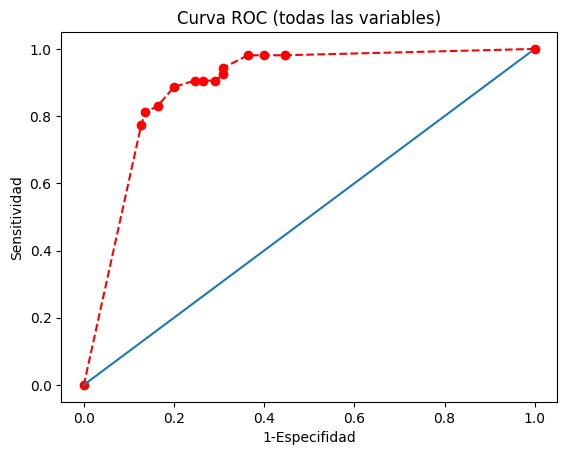

In [73]:
# plot de la curva de ROC
plt.plot(especifities_c,sensitivities, marker = 'o', linestyle = "--", color = 'r')

# pintamos la linea recta
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]

plt.plot(x,y)
plt.xlabel('1-Especifidad')
plt.ylabel('Sensitividad')
plt.title('Curva ROC (todas las variables)')
plt.show()

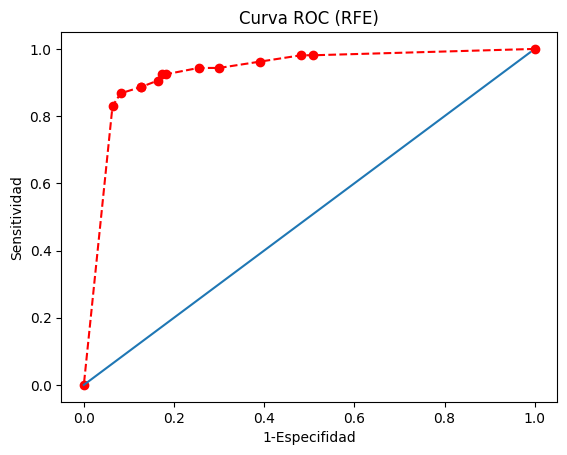

In [74]:
# Hacemos lo mismo para las 12 variables del RFE

thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]

sensitivities = [1] # ya incluimos el 1, para completar el gráfico
especifities_c = [1] # 1 - especificidad

for t in thresholds:
    prob_rfe_df['prediction'] = np.where(prob_rfe_df[0] >= t, 1, 0)
    prob_rfe_df['actual'] = list(y_test) ## para que coincidadn los index
    prob_rfe_df.head()

    cm_rfe = pd.crosstab(prob_rfe_df.prediction, prob_rfe_df.actual)

    #checamos bien los indices de la matriz
    TN = cm_rfe[0][0]
    TP = cm_rfe[1][1]
    FN = cm_rfe[1][0]
    FP = cm_rfe[0][1]

    sens = TP / (TP + FN)
    sensitivities.append(sens)

    espc_c = 1 - TN/(TN + FP)
    especifities_c.append(espc_c)

# rellenamos el otro extremo, donde los valores son cero
sensitivities.append(0)
especifities_c.append(0)

# plot de la curva de ROC
plt.plot(especifities_c,sensitivities, marker = 'o', linestyle = "--", color = 'r')

# pintamos la linea recta
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]

plt.plot(x,y)
plt.xlabel('1-Especifidad')
plt.ylabel('Sensitividad')
plt.title('Curva ROC (RFE)')
plt.show()

In [76]:
# 1. Instanciamos modelos, y sus hiperparámetros
lr = LogisticRegression(max_iter=20000)
lr_rfe = LogisticRegression(max_iter=20000)

# 2. Entrenamos modelos
lr.fit(X_train,y_train)
lr_rfe.fit(X_rfe_train, y_train)

# 3. Predicciones de clases y evaluación básica
y_pred = lr.predict(X_test)
y_pred_rfe = lr_rfe.predict(X_rfe_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Exactitud en test con todas las variables: {accuracy:.4f}")
print(f"Exactitud en test con 12 variables seleccionadas: {accuracy_rfe:.4f}")

# 4. Predicciones con probabilidades predichas
# Probabilidades para ROC y AUC
y_prob = lr.predict_proba(X_test)[:, 1]
y_prob_rfe = lr_rfe.predict_proba(X_rfe_test)[:, 1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_rfe = confusion_matrix(y_test, y_pred_rfe)

# Reportes detallados (incluye precisión, recall y F1)
print("=== Reporte modelo completo ===")
print(classification_report(y_test, y_pred))

print("=== Reporte modelo con RFE ===")
print(classification_report(y_test, y_pred_rfe))

# AUC
auc = roc_auc_score(y_test, y_prob)
auc_rfe = roc_auc_score(y_test, y_prob_rfe)
print(f"AUC con todas las variables: {auc:.4f}")
print(f"AUC con RFE (12 variables): {auc_rfe:.4f}")

Exactitud en test con todas las variables: 0.8405
Exactitud en test con 12 variables seleccionadas: 0.9018
=== Reporte modelo completo ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.75      0.77      0.76        53

    accuracy                           0.84       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.84      0.84      0.84       163

=== Reporte modelo con RFE ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       110
           1       0.86      0.83      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.88      0.89       163
weighted avg       0.90      0.90      0.90       163

AUC con todas las variables: 0.9271
AUC con RFE (12 variables): 0.9465


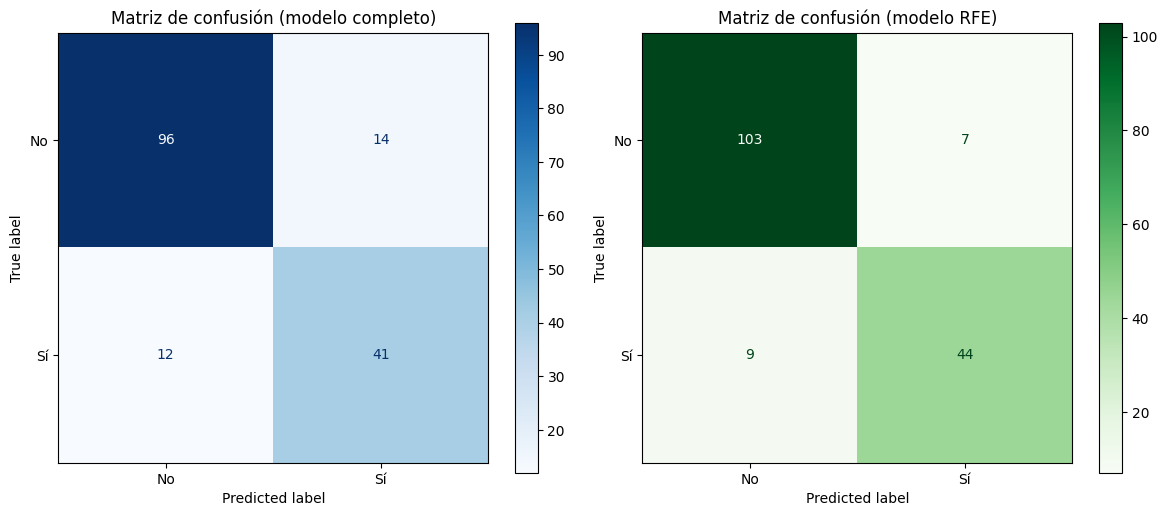

In [77]:
# Visualización de las matrices de confusión (para threshold 0.5)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm, display_labels=["No", "Sí"]).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Matriz de confusión (modelo completo)")

ConfusionMatrixDisplay(cm_rfe, display_labels=["No", "Sí"]).plot(ax=ax[1], cmap='Greens')
ax[1].set_title("Matriz de confusión (modelo RFE)")

plt.tight_layout()
plt.show()


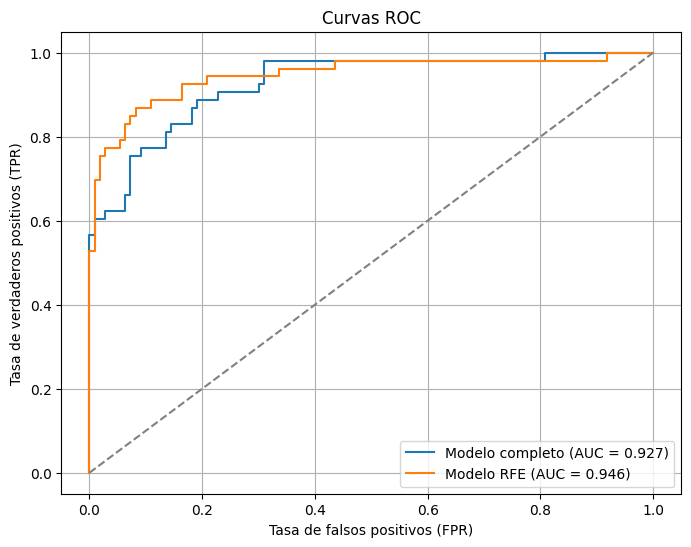

In [78]:
# Curvas de ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
fpr_rfe, tpr_rfe, _ = roc_curve(y_test, y_prob_rfe)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modelo completo (AUC = {auc:.3f})')
plt.plot(fpr_rfe, tpr_rfe, label=f'Modelo RFE (AUC = {auc_rfe:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curvas ROC')
plt.legend()
plt.grid(True)
plt.show()